# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from lib_file import lib_path
import random
import pickle
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import tensorflow as tf

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

import os
for dirname,_,filenames in os.walk('splitted_data'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

splitted_data\X_test.csv
splitted_data\X_train.csv
splitted_data\y_test.csv
splitted_data\y_train.csv


# Data Loading

In [2]:
X_train=pd.read_csv('splitted_data/X_train.csv')
X_test=pd.read_csv('splitted_data/X_test.csv')
y_train=pd.read_csv('splitted_data/y_train.csv')
y_test=pd.read_csv('splitted_data/y_test.csv')

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5600, 26) (1400, 26) (5600, 1) (1400, 1)


In [3]:
X_train.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,-0.373735,-0.543831,1.295009,0.058909,0.916827,1.255035,-1.382992,-1.044068,-0.211355,-0.129023,...,1.034005,0.169110,-0.425325,-1.429962,0.384971,-0.661675,0.020823,0.546574,-1.049811,-2.227644
1,-1.171488,-0.213452,-1.028681,-1.351766,-1.641807,-0.557869,0.424744,1.364377,-0.822490,-1.204932,...,-0.607823,0.301981,2.033777,-0.636606,-1.033362,-0.732536,-0.766305,-0.867931,0.557602,0.781155
2,0.850964,0.112918,0.380091,0.621110,0.466917,-0.296466,-0.741878,-0.498304,1.336591,1.044274,...,0.879125,0.179353,0.667587,0.991950,1.199450,0.934524,2.455034,1.023774,1.220419,0.850808
3,-0.373735,-0.543831,1.295009,0.058909,0.916827,1.255035,-1.382992,-1.044068,-0.211355,-0.129023,...,1.034005,0.169110,-0.425325,-1.429962,0.384971,-0.661675,0.020823,0.546574,-1.049811,-2.227644
4,-0.783686,0.314320,0.364082,-1.133215,-0.300844,0.610885,0.428276,-1.006722,-2.194283,-1.097149,...,0.414296,1.195521,1.096486,1.723997,0.794209,0.611817,-0.077284,0.120355,-0.214633,-0.136952


In [4]:
y_train.head()

,label
0,5
1,2
2,3
3,5
4,6


In [5]:
X_test.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,-0.055877,-0.793988,0.414757,-0.267827,0.106877,0.741708,0.305134,0.099880,-0.218391,1.362559,...,0.261777,0.391722,-0.562478,0.192899,-0.010240,-0.172493,-0.415604,0.856150,-0.580455,0.121196
1,-0.709915,-0.046078,0.050558,-0.465216,-0.223302,0.397341,0.752501,0.077610,-0.779228,0.602634,...,0.250875,-0.243635,-0.626883,-0.014167,-0.029307,-1.270040,-0.368611,0.020920,0.102889,-0.993220
2,-1.340797,1.095181,0.719629,-0.818908,0.154173,0.838073,-0.643431,-1.592210,-0.675200,0.564236,...,0.431170,0.125693,-0.722754,-0.541376,0.418042,-0.012918,-1.089063,-0.521001,1.220004,-0.814121
3,-0.379776,-0.099870,1.174512,-0.260245,0.580488,1.493934,1.036401,-0.778724,-0.363121,0.461912,...,-0.524999,-0.410282,-0.403656,-0.081180,-0.666789,-0.810492,-0.325911,0.490839,-0.955330,0.203396
4,-0.597943,0.228326,0.087577,-0.627073,-0.267828,-0.034996,0.445092,-0.579179,-0.796683,1.766248,...,0.838185,0.535970,0.831016,0.789880,1.750501,1.178959,0.306791,1.616978,0.750430,0.175823


In [6]:
y_test.head()

,label
0,0
1,0
2,0
3,6
4,0


---

# Algorithm-1 RidgeClassifier

In [7]:
from sklearn.linear_model import RidgeClassifier

rc_model = RidgeClassifier()
rc_model = rc_model.fit(X_train.values, y_train.values.ravel())

In [8]:
rc_prediction = rc_model.predict(X_test.values)
print(rc_prediction.tolist())

[6, 0, 0, 6, 0, 2, 2, 3, 6, 4, 4, 2, 3, 5, 5, 0, 6, 6, 4, 6, 4, 1, 1, 0, 5, 1, 2, 3, 1, 1, 5, 3, 4, 5, 6, 0, 0, 2, 2, 1, 5, 4, 6, 6, 5, 4, 4, 6, 1, 6, 1, 5, 6, 6, 1, 2, 0, 5, 3, 0, 5, 3, 0, 1, 1, 4, 3, 6, 1, 5, 0, 0, 1, 3, 4, 3, 5, 2, 3, 0, 0, 1, 0, 5, 6, 0, 3, 0, 0, 6, 5, 0, 4, 4, 1, 3, 5, 5, 0, 5, 6, 6, 5, 6, 0, 6, 3, 5, 4, 6, 3, 2, 4, 6, 4, 5, 5, 1, 6, 3, 5, 1, 4, 2, 2, 3, 0, 6, 6, 5, 3, 5, 3, 3, 3, 0, 3, 4, 1, 4, 6, 0, 0, 6, 1, 1, 0, 6, 1, 1, 6, 5, 6, 1, 6, 6, 1, 5, 3, 5, 0, 1, 1, 3, 6, 6, 3, 6, 6, 1, 6, 2, 1, 3, 2, 4, 2, 1, 4, 6, 2, 6, 4, 3, 3, 4, 1, 5, 3, 4, 5, 4, 2, 1, 4, 6, 1, 2, 3, 1, 6, 1, 0, 1, 0, 1, 6, 3, 0, 6, 6, 0, 1, 2, 4, 6, 5, 3, 2, 3, 6, 5, 3, 5, 1, 3, 5, 1, 0, 5, 1, 5, 6, 5, 0, 6, 6, 2, 1, 4, 6, 6, 5, 6, 1, 3, 5, 3, 4, 2, 1, 0, 3, 0, 6, 3, 6, 1, 6, 1, 4, 2, 1, 4, 4, 3, 1, 5, 0, 0, 5, 3, 4, 3, 6, 2, 5, 3, 5, 0, 1, 5, 2, 1, 6, 0, 4, 0, 3, 2, 2, 3, 6, 6, 3, 2, 0, 0, 1, 0, 0, 0, 0, 6, 4, 4, 5, 5, 1, 1, 2, 4, 0, 1, 6, 1, 3, 6, 6, 0, 1, 1, 0, 1, 5, 1, 2, 3, 6, 0, 0, 6, 3, 

In [9]:
y_true = y_test.values.ravel().tolist()
print(y_true)

[0, 0, 0, 6, 0, 2, 2, 3, 6, 4, 6, 2, 3, 5, 5, 0, 4, 6, 4, 0, 4, 1, 1, 0, 5, 1, 2, 3, 1, 2, 5, 3, 6, 5, 6, 0, 0, 2, 2, 1, 5, 4, 6, 6, 5, 4, 4, 6, 1, 3, 1, 5, 0, 6, 1, 2, 0, 4, 3, 0, 5, 3, 0, 1, 1, 4, 3, 0, 1, 5, 0, 6, 1, 3, 4, 3, 5, 2, 3, 0, 0, 1, 0, 5, 5, 3, 3, 0, 0, 6, 5, 0, 4, 6, 1, 3, 5, 5, 0, 5, 6, 6, 5, 6, 0, 6, 3, 5, 6, 6, 3, 2, 4, 6, 4, 5, 5, 1, 4, 3, 5, 1, 4, 2, 2, 1, 0, 6, 6, 5, 3, 5, 3, 3, 3, 0, 3, 4, 1, 4, 6, 0, 0, 6, 1, 1, 0, 4, 1, 4, 4, 5, 0, 1, 6, 3, 4, 5, 3, 5, 0, 1, 1, 3, 6, 6, 3, 6, 0, 1, 4, 2, 1, 3, 2, 4, 2, 1, 6, 6, 2, 6, 4, 3, 3, 6, 1, 5, 3, 4, 5, 4, 2, 1, 4, 6, 1, 2, 3, 1, 6, 2, 0, 1, 0, 1, 4, 3, 0, 6, 6, 0, 1, 2, 4, 6, 5, 3, 2, 3, 0, 5, 3, 5, 1, 3, 5, 5, 0, 5, 1, 5, 3, 5, 0, 6, 6, 2, 1, 4, 4, 6, 5, 6, 1, 3, 5, 3, 4, 2, 1, 0, 3, 0, 6, 3, 6, 1, 6, 2, 6, 2, 1, 4, 4, 3, 1, 5, 0, 0, 5, 3, 6, 4, 0, 2, 5, 3, 5, 0, 5, 5, 2, 1, 6, 0, 4, 0, 3, 2, 2, 3, 6, 6, 3, 2, 0, 3, 1, 0, 0, 0, 0, 6, 4, 4, 5, 5, 1, 1, 2, 4, 0, 1, 6, 1, 3, 6, 6, 0, 1, 1, 3, 1, 5, 1, 2, 3, 6, 0, 0, 6, 3, 

### Result Analysis

In [10]:
class_labels = ['Acrocephalus', 'Bubo', 'Caprimulgus', 'Emberiza', 'Ficedula', 'Glaucidium', 'Hippolais']

***Accuracy Score***

In [11]:
rc_model_accuracy=accuracy_score(y_true=y_true, y_pred=rc_prediction)
print("Validation accuracy of RidgeClassifier model is {:.2f}%".format(rc_model_accuracy*100))

Validation accuracy of RidgeClassifier model is 86.36%


***Classification Report***

In [12]:
print(classification_report(y_true=y_true, y_pred=rc_prediction, target_names=class_labels))

              precision    recall  f1-score   support

Acrocephalus       0.92      0.82      0.87       200
        Bubo       0.81      0.95      0.88       200
 Caprimulgus       1.00      0.92      0.96       200
    Emberiza       0.91      0.94      0.92       200
    Ficedula       0.81      0.70      0.75       200
  Glaucidium       0.98      0.91      0.94       200
   Hippolais       0.68      0.81      0.74       200

    accuracy                           0.86      1400
   macro avg       0.87      0.86      0.86      1400
weighted avg       0.87      0.86      0.86      1400



***Confusion Matrix***

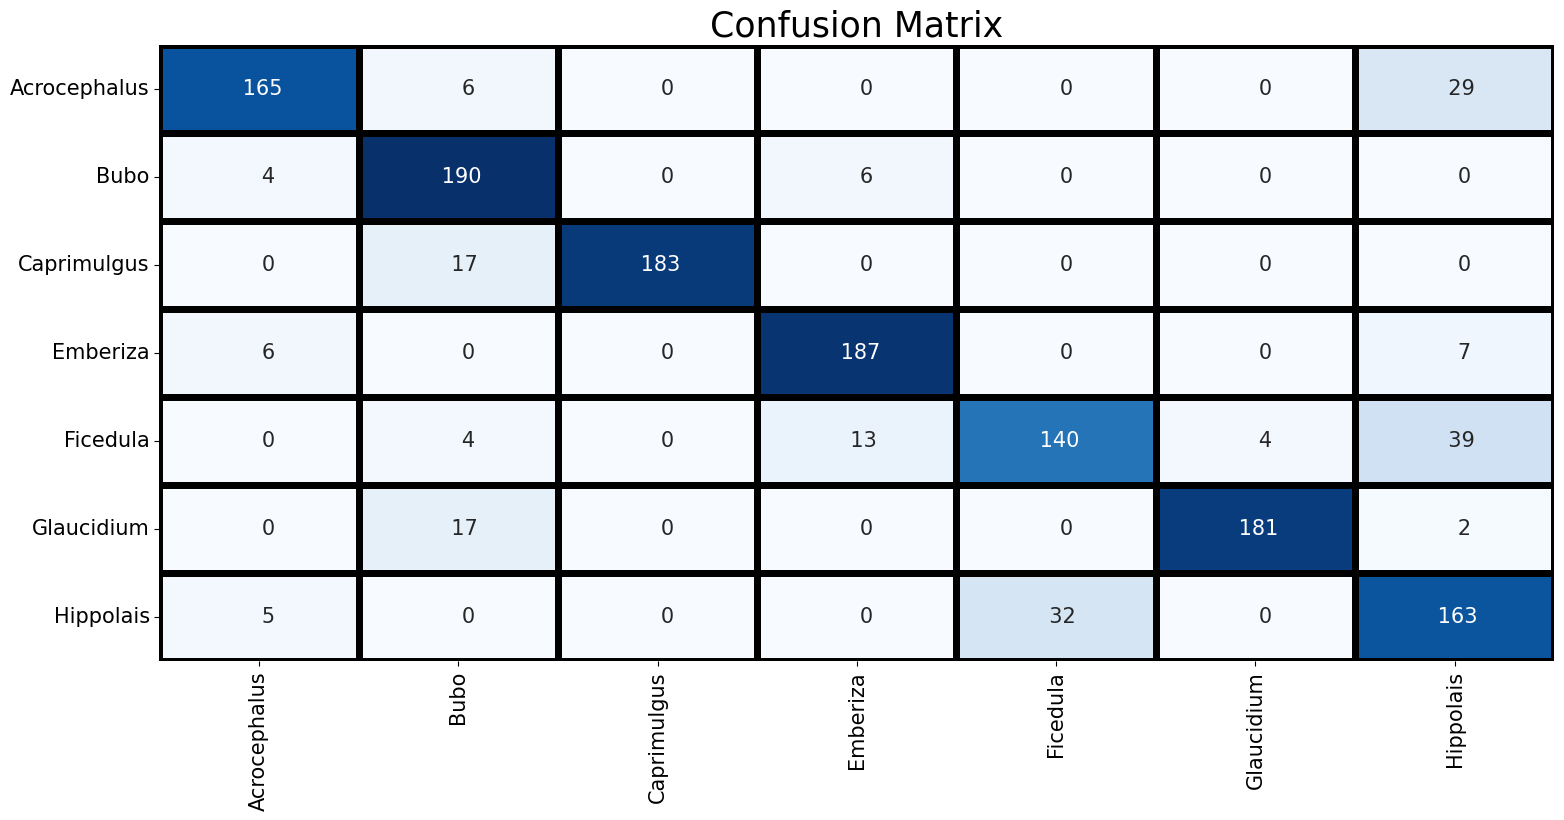

In [13]:
plt.figure(figsize=(18,8))
plt.rcParams['font.size'] = 15
sns.heatmap(
    data=confusion_matrix(y_true=y_true, y_pred=rc_prediction),
    annot=True,
    cmap=plt.cm.Blues,
    fmt = "4d",
    xticklabels=class_labels,
    yticklabels=class_labels,
    cbar=False,
    linewidths=5,
    linecolor='black'
)
plt.title(label="Confusion Matrix", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

***Model Saving***

In [14]:
with open(file="models/RidgeClassifier_model.pkl", mode="wb") as file:
    pickle.dump(obj=rc_model, file=file)

---

# Algorithm-2 : ArtificialNeuralNetwork

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import L1
y_train, y_test = to_categorical(y_train.values.ravel()), to_categorical(y_test.values.ravel())

In [16]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1], )))
model.add(Dense(units=32, activation='relu', kernel_regularizer=L1(l1=0.01)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.4))
model.add(Dense(units=64, activation='relu', kernel_regularizer=L1(l1=0.01)))
model.add(Dense(units=64, activation='relu', kernel_regularizer=L1(l1=0.01)))
model.add(Dense(units=128, activation='relu', kernel_regularizer=L1(l1=0.01)))
model.add(Dropout(rate=0.4))
model.add(Dense(units=y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                864       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                        

In [18]:
EPOCHS = 45

history = model.fit(
    x=X_train.values,
    y=y_train,
    batch_size=64,
    epochs=EPOCHS,
    validation_data=(X_test.values, y_test)
)

Epoch 1/45
88/88 [==============================] - 7s 15ms/step - loss: 12.5266 - accuracy: 0.3395 - val_loss: 8.1922 - val_accuracy: 0.5343
Epoch 2/45
88/88 [==============================] - 1s 8ms/step - loss: 5.3804 - accuracy: 0.5163 - val_loss: 3.4667 - val_accuracy: 0.6314
Epoch 3/45
88/88 [==============================] - 1s 7ms/step - loss: 2.5387 - accuracy: 0.5727 - val_loss: 2.1064 - val_accuracy: 0.6579
Epoch 4/45
88/88 [==============================] - 1s 7ms/step - loss: 1.8052 - accuracy: 0.6154 - val_loss: 1.7475 - val_accuracy: 0.6936
Epoch 5/45
88/88 [==============================] - 1s 7ms/step - loss: 1.5375 - accuracy: 0.6632 - val_loss: 1.5094 - val_accuracy: 0.7529
Epoch 6/45
88/88 [==============================] - 1s 7ms/step - loss: 1.3879 - accuracy: 0.7134 - val_loss: 1.3439 - val_accuracy: 0.7779
Epoch 7/45
88/88 [==============================] - 1s 7ms/step - loss: 1.2942 - accuracy: 0.7448 - val_loss: 1.1857 - val_accuracy: 0.8036
Epoch 8/45
88/88 [

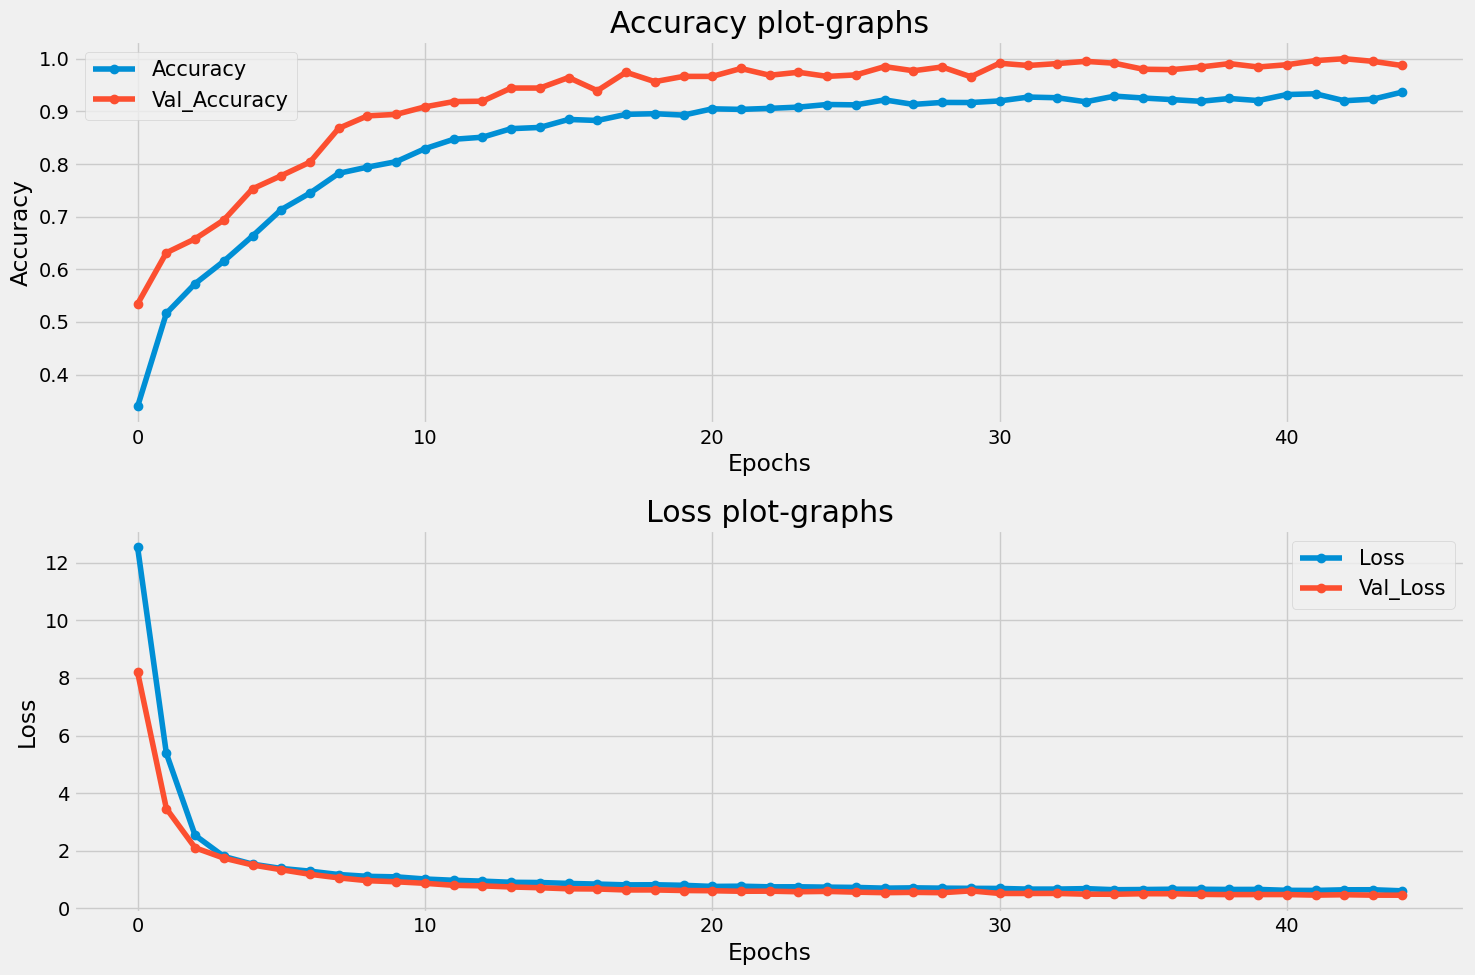

In [19]:
with plt.style.context(style="fivethirtyeight"):
    fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(15,10))
    plt.rcParams["font.size"]=15
    axes[0].plot(history.history['accuracy'],label='Accuracy',marker='o')
    axes[0].plot(history.history['val_accuracy'],label='Val_Accuracy',marker='o')
    axes[0].set_title(label='Accuracy plot-graphs')
    axes[0].set_xlabel(xlabel='Epochs')
    axes[0].set_ylabel(ylabel='Accuracy')
    axes[0].legend()
    axes[1].plot(history.history['loss'],label='Loss',marker='o')
    axes[1].plot(history.history['val_loss'],label='Val_Loss',marker='o')
    axes[1].set_title(label='Loss plot-graphs')
    axes[1].set_xlabel(xlabel='Epochs')
    axes[1].set_ylabel(ylabel='Loss')
    axes[1].legend()
    fig.tight_layout()
    plt.show()

In [20]:
model_prediction = model.predict(X_test.values, batch_size=32, verbose=1)
model_prediction

44/44 [==============================] - 1s 3ms/step


array([[8.36207926e-01, 2.20173318e-03, 1.62706769e-03, ...,
        1.33747393e-02, 2.11052666e-03, 1.33305699e-01],
       [9.93300080e-01, 5.98213868e-04, 6.10020477e-03, ...,
        1.14057934e-06, 1.00758768e-09, 1.00418465e-08],
       [9.92980957e-01, 5.71843528e-04, 6.44605095e-03, ...,
        7.96083384e-07, 5.67936809e-10, 5.10862952e-09],
       ...,
       [1.92850871e-06, 5.34667727e-03, 2.41438954e-07, ...,
        1.09033156e-02, 4.87140933e-05, 8.47513547e-06],
       [2.55242882e-10, 1.90843688e-03, 9.98091161e-01, ...,
        5.79987045e-08, 3.16785929e-07, 5.69603743e-20],
       [7.25819618e-08, 3.93402763e-03, 6.36454711e-09, ...,
        5.90444659e-04, 3.06139918e-06, 7.91860586e-08]], dtype=float32)

In [21]:
prediction = np.argmax(model_prediction, axis=1).tolist()
print(prediction)

[0, 0, 0, 6, 0, 2, 2, 3, 6, 4, 6, 2, 3, 5, 5, 0, 4, 6, 4, 0, 4, 1, 1, 0, 5, 1, 2, 3, 1, 2, 5, 3, 6, 5, 6, 0, 0, 2, 2, 1, 5, 4, 6, 6, 5, 4, 4, 6, 1, 0, 1, 5, 0, 6, 1, 2, 0, 4, 3, 0, 5, 3, 0, 1, 1, 4, 3, 0, 1, 5, 0, 0, 1, 3, 4, 3, 5, 2, 3, 0, 0, 1, 0, 5, 5, 6, 3, 0, 0, 6, 5, 0, 4, 6, 1, 3, 5, 5, 0, 5, 6, 6, 5, 6, 0, 6, 3, 5, 6, 6, 3, 2, 4, 6, 4, 5, 5, 1, 4, 3, 5, 1, 4, 2, 2, 1, 0, 6, 6, 5, 3, 5, 3, 3, 3, 0, 3, 4, 1, 4, 6, 0, 0, 6, 1, 1, 0, 4, 1, 4, 4, 5, 0, 1, 6, 0, 4, 5, 3, 5, 0, 1, 1, 3, 6, 6, 3, 6, 0, 1, 4, 2, 1, 3, 2, 4, 2, 1, 6, 6, 2, 6, 4, 3, 3, 6, 1, 5, 3, 4, 5, 4, 2, 1, 4, 6, 1, 2, 3, 1, 6, 2, 0, 1, 0, 1, 4, 3, 0, 6, 6, 0, 1, 2, 4, 6, 5, 3, 2, 3, 0, 5, 3, 5, 1, 3, 5, 5, 0, 5, 1, 5, 0, 5, 0, 6, 6, 2, 1, 4, 4, 6, 5, 6, 1, 3, 5, 3, 4, 2, 1, 0, 3, 0, 6, 3, 6, 1, 6, 2, 6, 2, 1, 4, 4, 3, 1, 5, 0, 0, 5, 3, 6, 4, 0, 2, 5, 3, 5, 0, 5, 5, 2, 1, 6, 0, 4, 0, 3, 2, 2, 3, 6, 6, 3, 2, 0, 6, 1, 0, 0, 0, 0, 6, 4, 4, 5, 5, 1, 1, 2, 4, 0, 1, 6, 1, 3, 6, 6, 0, 1, 1, 6, 1, 5, 1, 2, 3, 6, 0, 0, 6, 3, 

In [22]:
true_labels = np.argmax(y_test, axis=1).tolist()
print(true_labels)

[0, 0, 0, 6, 0, 2, 2, 3, 6, 4, 6, 2, 3, 5, 5, 0, 4, 6, 4, 0, 4, 1, 1, 0, 5, 1, 2, 3, 1, 2, 5, 3, 6, 5, 6, 0, 0, 2, 2, 1, 5, 4, 6, 6, 5, 4, 4, 6, 1, 3, 1, 5, 0, 6, 1, 2, 0, 4, 3, 0, 5, 3, 0, 1, 1, 4, 3, 0, 1, 5, 0, 6, 1, 3, 4, 3, 5, 2, 3, 0, 0, 1, 0, 5, 5, 3, 3, 0, 0, 6, 5, 0, 4, 6, 1, 3, 5, 5, 0, 5, 6, 6, 5, 6, 0, 6, 3, 5, 6, 6, 3, 2, 4, 6, 4, 5, 5, 1, 4, 3, 5, 1, 4, 2, 2, 1, 0, 6, 6, 5, 3, 5, 3, 3, 3, 0, 3, 4, 1, 4, 6, 0, 0, 6, 1, 1, 0, 4, 1, 4, 4, 5, 0, 1, 6, 3, 4, 5, 3, 5, 0, 1, 1, 3, 6, 6, 3, 6, 0, 1, 4, 2, 1, 3, 2, 4, 2, 1, 6, 6, 2, 6, 4, 3, 3, 6, 1, 5, 3, 4, 5, 4, 2, 1, 4, 6, 1, 2, 3, 1, 6, 2, 0, 1, 0, 1, 4, 3, 0, 6, 6, 0, 1, 2, 4, 6, 5, 3, 2, 3, 0, 5, 3, 5, 1, 3, 5, 5, 0, 5, 1, 5, 3, 5, 0, 6, 6, 2, 1, 4, 4, 6, 5, 6, 1, 3, 5, 3, 4, 2, 1, 0, 3, 0, 6, 3, 6, 1, 6, 2, 6, 2, 1, 4, 4, 3, 1, 5, 0, 0, 5, 3, 6, 4, 0, 2, 5, 3, 5, 0, 5, 5, 2, 1, 6, 0, 4, 0, 3, 2, 2, 3, 6, 6, 3, 2, 0, 3, 1, 0, 0, 0, 0, 6, 4, 4, 5, 5, 1, 1, 2, 4, 0, 1, 6, 1, 3, 6, 6, 0, 1, 1, 3, 1, 5, 1, 2, 3, 6, 0, 0, 6, 3, 

### Result Analysis

In [23]:
class_labels = ['Acrocephalus', 'Bubo', 'Caprimulgus', 'Emberiza', 'Ficedula', 'Glaucidium', 'Hippolais']

***Accuracy Score***

In [24]:
ann_model_accuracy = accuracy_score(y_true=true_labels, y_pred=prediction)
print("Validation accuracy of ArtificialNeuralNetwork model is {:.2f}%".format(ann_model_accuracy*100))

Validation accuracy of ArtificialNeuralNetwork model is 98.71%


***Classification Report***

In [25]:
print(classification_report(y_true=true_labels, y_pred=prediction, target_names=class_labels))

              precision    recall  f1-score   support

Acrocephalus       0.94      1.00      0.97       200
        Bubo       1.00      1.00      1.00       200
 Caprimulgus       1.00      1.00      1.00       200
    Emberiza       1.00      0.94      0.97       200
    Ficedula       1.00      1.00      1.00       200
  Glaucidium       1.00      1.00      1.00       200
   Hippolais       0.97      0.97      0.97       200

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400



***Confusion Matrix***

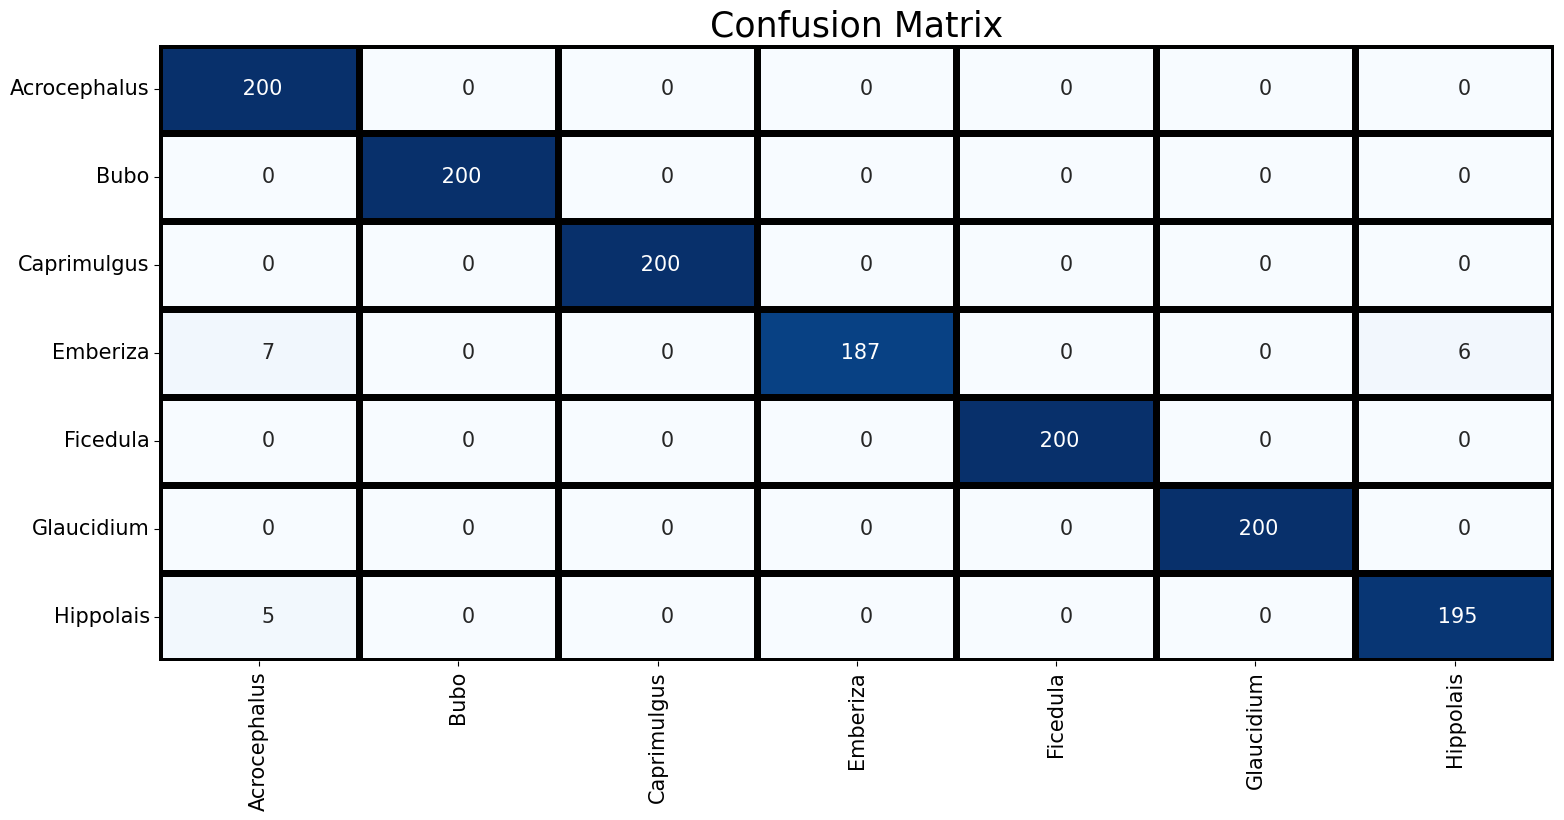

In [26]:
plt.figure(figsize=(18,8))
plt.rcParams['font.size'] = 15
sns.heatmap(
    data=confusion_matrix(y_true=true_labels, y_pred=prediction),
    annot=True,
    cmap=plt.cm.Blues,
    fmt = "4d",
    xticklabels=class_labels,
    yticklabels=class_labels,
    cbar=False,
    linewidths=5,
    linecolor='black'
)
plt.title(label="Confusion Matrix", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

***Model Saving***

In [27]:
model.save("models/ArtificialNeuralNetwork_model.h5")

---